Maximum Likelihood estimation (MLE)
-----

-----
Part I: Fitting Emperical Data
-----

In [1]:
reset -fs

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
heights = pd.read_csv('../../data/plant.csv')
heights.head()

,0
0,38.908525
1,43.156130
2,39.910492
3,42.520638
4,40.462430


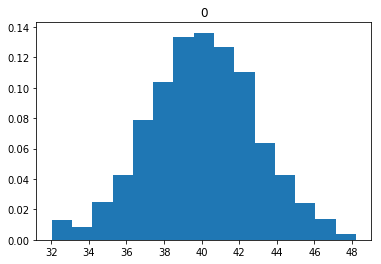

In [7]:
# Always take a peek at your raw data. 
# It is critical for MLE since you need to guess the distribution/model
heights.hist(normed=True,
             bins=15, 
             grid=False);
# ylabel('Probability')
# xlabel('Height of plant');

In [6]:
# Look at the summary stats
# Focus on min, max, and mean
heights.describe()

,0
count,1000.000000
mean,40.017209
std,2.873319
min,32.022567
25%,38.087044
50%,40.086478
75%,41.942700
max,48.214524


It looks Normal-ish to me

X ~ N(μ, σ^2)

-------
The likelihood function is
![](https://www.statlect.com/images/normal-distribution-maximum-likelihood__8.png)
(i hate Latex)

[Source](https://www.statlect.com/fundamentals-of-statistics/normal-distribution-maximum-likelihood)

In [9]:
def normal_likelihood(m, data):
    "For a given mean, find the product of all likelihoods (the pdf for the observed data)"
    return np.product(stats.norm(m, 3).pdf(data))

In [10]:
# Arbitrarily define a range
# Yes - I know this is weird. It is just a toy example. Consider it a prior. We think the best estimate is somewhere in there.
range_of_means = np.linspace(32, 42)

In [11]:
# Let's find all the likelihoods.
# For each candidate mean (estimate of µ), let's see how well it would fit the observed data
likelihoods = [normal_likelihood(m, heights) for m in range_of_means]
likelihoods[:5]  # Underflow - Damn!

[0.0, 0.0, 0.0, 0.0, 0.0]

The log-likelihood function is
![](https://www.statlect.com/images/normal-distribution-maximum-likelihood__10.png)


In [12]:
def normal_log_likelihood(m, data):
    "Let's pull the log trick! Calculate the log-likelihoods. Remember to switch to sum!"
    return sum(np.log(stats.norm(m, 3).pdf(data)))

In [32]:
# Let's find all the log likelihoods.
# For each candidate mean (estimate of µ), let's see how well it would fit the observed data
loglikelihoods = [normal_log_likelihood(m, heights) for m in range_of_means]
loglikelihoods[:5]  # Reasonable

[array([-6046.62535769]),
 array([-5867.14308956]),
 array([-5692.28852285]),
 array([-5522.06165756]),
 array([-5356.4624937])]

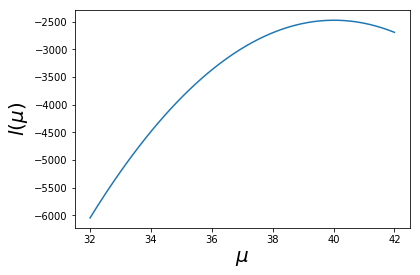

In [33]:
# Plot the log-likelihoods
# We want the "top of the mountain", aka where the derivative is zero in a monotonically increasing function
fig = plt.figure().add_subplot(111)
fig.plot(range_of_means, loglikelihoods)
fig.set_xlabel('$\mu$', fontsize=20)
fig.set_ylabel('$l(\mu)$', fontsize=20);

In [34]:
# For our window of means where is the peak
top_of_the_mountain = range_of_means[np.argmax(loglikelihoods)]
f"{top_of_the_mountain:.4}"

'39.96'

In [16]:
# Let's define our "least-wrong" model for the empircal data. This might not be the "true" but is "useful"
μ = top_of_the_mountain
σ = 3 # Given to us so we don't have to estimate it

In [17]:
from scipy.stats import norm

In [1]:
# Let's plot our model on our data
heights.hist(normed=True, bins=15, grid=False);

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)

plt.plot(x, p, 'k', linewidth=2);
plt.title("Fit results: mu = {:.2f},  std = {:.2f}".format(μ, σ));

NameError: name 'heights' is not defined

So we over-predict sometimes and under-predict other times, but is decent.

-----
Part II: Fitting Distrubtions
-----

**Question 2**

Let $X_1, \dots, X_n$ be i.i.d. with PDF  

$$ f(x | \theta) = \theta x^{\theta - 1} \text{, } 0 < x < \infty \text{, } 0 < \theta < \infty $$

Find the MLE of $\theta$.

$$ \text{likelihood = } L(\theta | \textbf{x}) = \prod_{i = 1}^n \theta x_i^{\theta - 1}$$  
$$ \log\text{likelihood}=\log L(\theta | \textbf{x}) = log(\prod_{i = 1}^n \theta x_i^{\theta - 1})$$  
$$ = \sum{\log( \theta x_i^{\theta - 1})}$$  
$$ = \sum{\log{ \theta }} + \sum{\log{ x_i^{\theta - 1}}} $$  
$$ = \sum{\log{ \theta }} + (\theta - 1)\sum{\log x_i} $$  
To maximize log likelihood, differentiate with respect to $\theta$ because $X_i$'s given and $\theta$ is variable. Set to 0:  

$$ \frac{\partial log likelihood}{\partial \theta} = \sum{1 / \theta} + \sum \log x_i = 0$$  
$$\sum{1 / \theta} = - \sum \log x_i$$  
$$ n/\theta = -\sum \log x_i $$  
$$ \hat{\theta} = - \frac{n}{\sum \log x_i} $$  


**Question 3**

Let $X_1, \dots, X_n$ be a random sample from a population with PMF

$$ P(X = x) = \theta^x (1 - \theta)^{1 - x} \text{, } x = 0 \text{ or } 1 \text{, } 0 \leq \theta \leq \frac{1}{2} $$  

(a) Find the MOM estimator and MLE of $\theta$.    

Notice that this PMF is really a Bernoulli (1 with probability $\theta$, 0 with probability $(1 - \theta)$)  

~**To find the MOM estimator**:  
$$ \text{1st population moment} = E(X) = \sum{x \times P(X = x)} =  0 \times \theta^0 (1 - \theta) ^ 1 + 1 \times \theta ^ 1 (1 - \theta)^0 = \theta$$  

For a population, the expected value $E(X) = \theta$.  

$$ \text{1st sample moment} = \frac{1}{n} \sum_{i = 1}^n X_i = \bar{X} $$  

Setting the population moment equal to the sample moment, and solve for $\theta$ to obtain the MOM estimator,  

$\hat{\theta} = \bar{X}$, so we could estimate $\theta$ with the sample average. ~
 
**To find the MLE**:  
$$ \text{likelihood = } L(\theta | \textbf{x}) = \prod_{i = 1}^n \theta ^ {x_i} (1 - \theta) ^ {1 - x_i}$$  
$$ \text{log likelihood = log } L(\theta | \textbf{x}) = \log(\prod_{i = 1}^n \theta ^ {x_i} (1 - \theta) ^ {1 - x_i})$$  
$$= \sum_{i = 1}^n log(\theta^{x_i} (1 - \theta)^{1 - x_i})$$  
$$= \sum_{i = 1}^n \left(x_i log(\theta) + (1 - x_i) log(1 - \theta) \right)$$  
$$ = log (\theta) \sum_{i = 1}^n x_i + log(1 - \theta) \sum_{i = 1}^n {(1 - x_i)}$$  
To maximize, differentiate with respect to $\theta$, set it to 0 and solve for $\theta$  


$$ \frac{\partial l(\theta)}{\partial \theta} = 1 / \theta \sum x_i + \frac{-1}{1 - \theta} \sum{(1 - x_i)} = 0$$  
$$ 1 / \theta \sum x_i = \frac{1}{1 - \theta} \sum{(1 - x_i)}$$  
$$ \frac{1 - \theta}{\theta} = \frac{\sum{(1 - x_i)}}{\sum x_i}$$  
$$ \frac 1  \theta - 1 = \frac{ n - \sum x_i} {\sum x_i} = \frac{n}{\sum x_i} - 1$$  
$$ \frac 1 \theta = \frac{n}{\sum x_i} $$  
$$ \hat{\theta} = \frac{\sum x_i}{n} = \bar{X} $$  

(b) Find the mean squared errors (MSE) of each of the estimators.  
From the lecture:  
$$ E(\hat{\theta} - \theta)^2 = Var(\hat{\theta}) + (E(\hat{\theta}) - \theta)^2 = Var(\hat{\theta}) + (Bias(\hat{\theta}))^2 $$  
$$Bias(\hat{\theta}) = E(\hat{\theta}) - \theta$$ 
Let's calculate bias first. In both cases, $\hat \theta = \bar X$:
$$Bias(\hat{\theta}) = E(\hat{\theta}) - \theta$$  
$$ = E(\bar X ) - \theta  $$  
$$ = E(\frac 1 n \sum X_i) - \theta $$
$$ = \frac 1 n E(\sum X_i) - \theta $$
$$ = \frac 1 n \sum{E(X_i)} - \theta $$ 
$$ = \frac 1 n \sum \theta - \theta $$
$$ \theta - \theta = 0 $$  
Hence both estimators are unbiased since bias equals 0.
Let's calculate variance of the estimator:
$$ Var(\hat{\theta}) = Var(\bar X) $$  
$$ = Var(\frac{1}{n} \sum X_i) $$
$$ = \frac{1}{n^2} Var(\sum X_i) $$
$$ = \frac {1} {n ^ 2} \sum Var(X_i)$$  

From the PMF, we could recognize that $X$ follows a Bernoulli distribution, so 

$$ Var(X) = \theta (1 - \theta) $$  

$$ Var(\hat{\theta}) = \frac {1} {n ^ 2} \sum Var(X_i) = \frac{1}{n^2} n Var(X) = \frac{1}{n} \theta (1 - \theta) $$

In conclusion: 
$$ MSE = Var(\hat{\theta}) + (Bias(\hat{\theta}))^2 = \frac{1}{n} \theta (1 - \theta) + 0 ^ 2 = \frac{1}{n} \theta (1 - \theta)$$  


(c) Which estimator is preferred? Justify your choice.  
Yes.

----
Challenge Exercises
----


-----

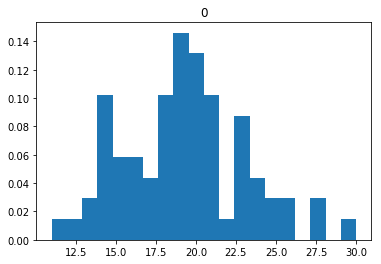

In [22]:
# 1.
outages = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv')
# 2.
outages.hist(normed=True, 
             bins=20,
             grid=False);

3 . **Poisson distribution.**

Since the data is count of an event per time period

4 . **Write down the Random variable**

$\text{Let X be the number of power outage in a month in Kampala}$

$X \sim Poisson(\lambda)$

5. **Likelihood function** for rate of outages

$$\mathcal{L}(\lambda) = \prod_{i=0}^n \frac{{e^{ - \lambda } \lambda ^{x_i} }}{{x_i!}}$$

x is data


In [23]:
def likelihood(lam, data):
    "Generate likelihood for Possion distribution given data"
    return np.product(stats.poisson(lam).pmf(data))

In [24]:
# 7. Find likelihood for each value and plot likelihoods
lambdas = np.linspace(14, 21) # Define possible λ for Possion https://en.wikipedia.org/wiki/Poisson_distribution

In [25]:
likelihoods = [likelihood(lam, outages) 
               for lam in lambdas]
likelihoods[:5]

[8.8453275498355079e-116,
 3.8575773815974372e-114,
 1.4606332148378542e-112,
 4.8152063665037619e-111,
 1.3858657093701603e-109]

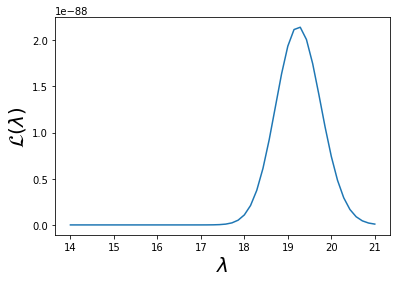

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lambdas, likelihoods)
ax.set_xlabel('$\lambda$', fontsize=20)
ax.set_ylabel('$\mathcal{L}(\lambda)$', fontsize=20);

In [27]:
# 8. Python function to calculate log likelihood
def log_likelihood(lam, data):
    return sum(np.log(stats.poisson(lam).pmf(data)))

In [28]:
# Calculate log likelihoods
log_likelihoods = [log_likelihood(lam, outages) for lam in lambdas]
log_likelihoods[:5]

[array([-264.91998143]),
 array([-261.14466124]),
 array([-257.51066036]),
 array([-254.01516642]),
 array([-250.65545013])]

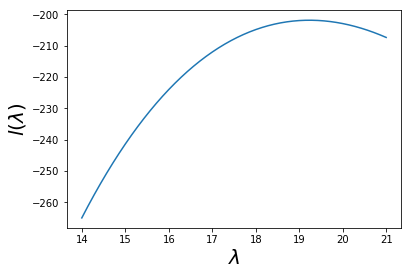

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lambdas, log_likelihoods)
ax.set_xlabel('$\lambda$', fontsize=20)
ax.set_ylabel('$l(\lambda)$', fontsize=20);

In [30]:
# 9. Find MLE by maximzing the log likelihood function
f"{lambdas[np.argmax(log_likelihoods)]:.4}"

'19.29'

In [31]:
# The likelihood function gives the same maximum
f"{lambdas[np.argmax(likelihoods)]:.4}"

'19.29'

If k is the number of occurrences. λ is the expected number of occurrences. 

Using the Poision PMF we can estimate the probability of k occurrences given λ. 

There is a shocking rate of outages in the power grid in Kampala. It is like the SF campus internet!

<br>
<br> 
<br>

----